**IMDB Review Text/Sentiment Analysis SL**

1. SYEINRITA DEVI ANBEALAGAN MCS22102


### Data Exploration & Preprocessing

In [1]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('IMDB Dataset.csv')
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Get the shape of the DataFrame
shape = df1.shape

# Print the DataFrame shape
print('\nDataFrame Shape:', shape)

# Get and print the number of rows
num_rows = shape[0]
print('\nNumber of rows:', num_rows)

# Get and print the number of columns
num_columns = shape[1]
print('\nNumber of columns:', num_columns)



DataFrame Shape: (50000, 2)

Number of rows: 50000

Number of columns: 2


In [3]:
# Check for data type
data_types = df1.dtypes
print(data_types)

review       object
sentiment    object
dtype: object


In [4]:
# Get summary statistics for numeric columns in the DataFrame
df1.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
# Check for missing values
missing_values = df1.isnull().sum()

# Print the count of missing values in each column
print("Number of missing values:")
print(missing_values)

Number of missing values:
review       0
sentiment    0
dtype: int64


In [6]:
# Check for duplicates
duplicate_rows = df1.duplicated()

# Count the number of duplicate rows
duplicate_count = duplicate_rows.sum()

# Print the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 418


In [7]:
df1 = df1.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicates: {df1.shape}")


Shape of DataFrame after removing duplicates: (49582, 2)


In [8]:
# Rename the 'sentiment' column to 'sentiment_category' in df1
df1 = df1.rename(columns={'sentiment': 'sentiment_category'})

# Create a new column in df1 based on the 'sentiment' column
# If sentiment is 'positive', assign 1; otherwise, assign 0

df1['sentiment_encoded'] = df1["sentiment_category"].apply(lambda i: 1 if i == "positive" else 0)

# Print the dataset
df1

,review,sentiment_category,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [9]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [10]:
from langdetect import detect

df1['language'] = df1['review'].apply(lambda x: detect(x) if pd.notnull(x) else None)

# Display the distribution of detected languages
print(df1['language'].value_counts())


language
en    49581
id        1
Name: count, dtype: int64


In [11]:
indonesian_comments_df = df1[df1['language'] == 'id']

# Display the DataFrame with Indonesian comments
indonesian_comments_df['review']


45315    .....whoops - looks like it's gonna cost you a...
Name: review, dtype: object

### Text Normalization

In [12]:
#!pip install contractions
#!pip install nltk

In [9]:
import re
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from contractions import contractions_dict
import contractions


# Function to fix contractions using the contractions library
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

# Function for text processing
def text_processing(review, default_replace=""):
    # Convert review to lowercase
    review = review.lower()
    
    # Remove HTML tags
    review = re.sub('<.*?>', default_replace, review)
    
    # Remove URLs
    review = re.sub('https?://\S+|www\.\S+', default_replace, review)   
    return review

# Function for custom tokenization
def custom_tokenize(review):
    token_list = word_tokenize(review)

    # Remove punctuation
    token_list = [token for token in token_list if token not in string.punctuation]

    # Keep alphabets only
    token_list = [token for token in token_list if token.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    token_list = [token for token in token_list if not token in stop_words]

    return token_list

# Function to stem tokens
def stem_tokens(tokens, stemmer):
    token_list = [stemmer.stem(token) for token in tokens]
    return token_list

# Function to process a review (combining the above functions)
def process_review(review):
    # Step 1: Text Processing
    review = text_processing(review)
    
    # Step 2: Expanding Contractions
    review = fix_contractions(review)
    
    # Step 3: Tokenization
    tokens = custom_tokenize(review)
    
    # Step 4: Stemming
    stemmer = SnowballStemmer("english")  # Define stemmer
    stem = stem_tokens(tokens, stemmer)  # Stem tokens
    
    # Step 5: Return the processed and tokenized review
    return stem

# Print tokenized words for a random subset of comments to see how it is working
for i in range(3):
    random_index = random.randint(0, len(df1))
    tweet = df1.iloc[random_index]["review"]
    print(process_review(tweet))
    print("\n")

['actual', 'watch', 'film', 'write', 'follow', 'comment', 'prove', 'lack', 'develop', 'true', 'artist', 'film', 'maker', 'thought', 'still', 'think', 'present', 'view', 'film', 'put', 'mild', 'overr', 'look', 'like', 'realli', 'realli', 'bad', 'student', 'film', 'done', 'someon', 'beyond', 'extrem', 'limit', 'resourc', 'pay', 'much', 'attent', 'want', 'go', 'regard', 'differ', 'way', 'find', 'film', 'lack', 'well', 'get', 'rememeb', 'fulli', 'admit', 'mayb', 'idiot', 'film', 'maker', 'get', 'piec', 'imagin', 'genius', 'rent', 'whim', 'review', 'outstand']


['beauti', 'construct', 'traffik', 'tell', 'stori', 'narcot', 'usag', 'commerc', 'multipl', 'point', 'view', 'policeman', 'view', 'politician', 'view', 'addict', 'view', 'smuggler', 'view', 'farmer', 'view', 'care', 'contruct', 'storylin', 'one', 'get', 'impress', 'everyth', 'beauti', 'shot', 'poppi', 'field', 'pakistan', 'downtown', 'karachi', 'entri', 'point', 'airport', 'frankfurt', 'london', 'delapid', 'build', 'smuggl', 'take',

In [10]:
# Applying the processing function to the DataFrame
df1["token"] = df1["review"].apply(process_review)

# Display the DataFrame
df1.head()

,review,sentiment_category,sentiment_encoded,token
0,One of the other reviewers has mentioned that ...,positive,1,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,1,"[wonder, littl, product, film, techniqu, fashi..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,0,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[petter, mattei, love, time, money, visual, st..."


### Exploratory Data Analysis (EDA)

sentiment_category
positive    24884
negative    24698
Name: count, dtype: int64


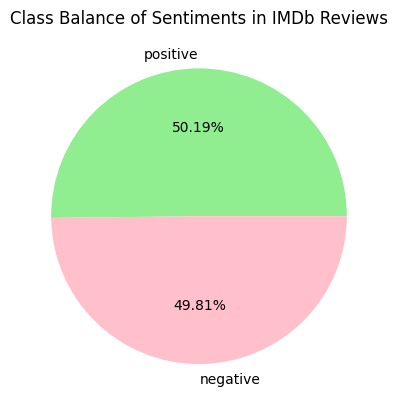

In [15]:
#!pip install matplotlib
import matplotlib.pyplot as plt

# Checking the class balance of the dataset
sentiment_counts = df1['sentiment_category'].value_counts()
print(sentiment_counts)

# Pie chart
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%.2f%%', colors=['lightgreen', 'pink'])
plt.title('Class Balance of Sentiments in IMDb Reviews')
plt.show()


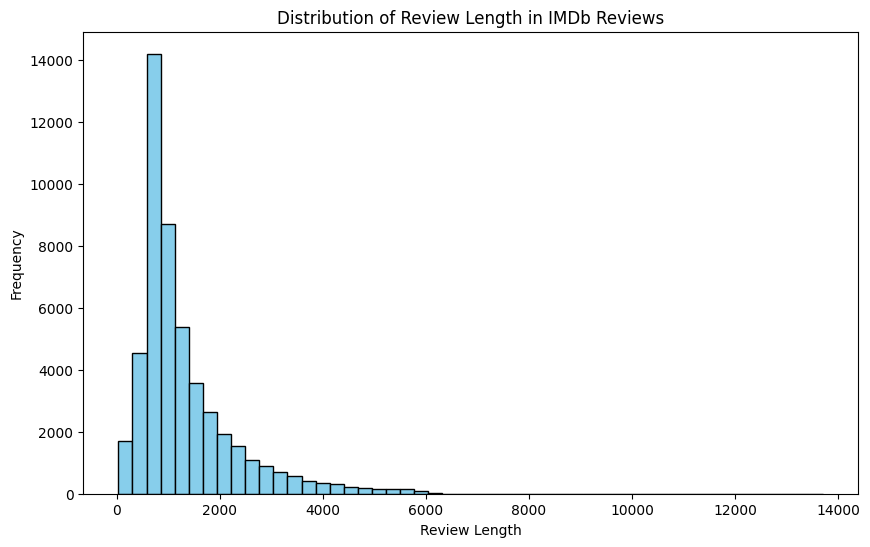

In [16]:
# Histogram for review length
plt.figure(figsize=(10, 6))
df1['review_length'] = df1['review'].apply(len)
plt.hist(df1['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Length in IMDb Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


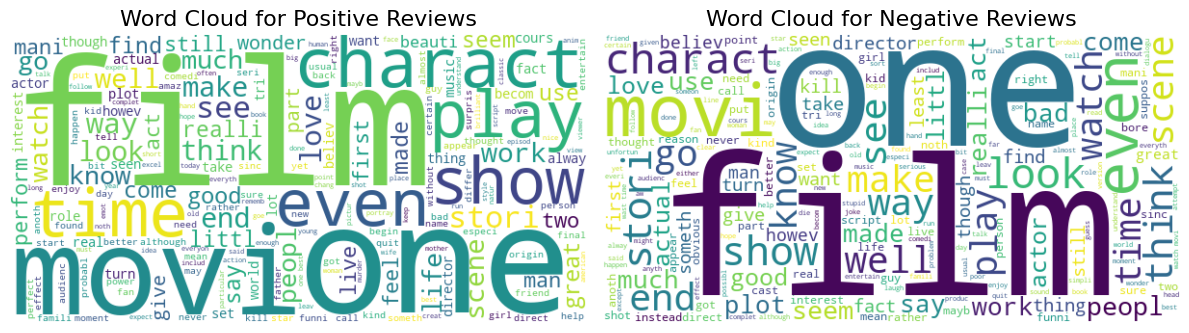

In [17]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine positive and negative reviews for word cloud generation
positive_reviews = ' '.join([word for sublist in df1[df1['sentiment_category'] == 'positive']['token'] for word in sublist])
negative_reviews = ' '.join([word for sublist in df1[df1['sentiment_category'] == 'negative']['token'] for word in sublist])

# Generate word clouds
plt.figure(figsize=(12, 7))

# Word Cloud for Positive Reviews
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=600, height=300, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.axis('off')

# Word Cloud for Negative Reviews
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=600, height=300, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the word clouds
plt.show()


In [13]:
# Filter positive reviews containing the word 'film'
positive_reviews_with_film = df1[(df1['sentiment_category'] == 'positive') & df1['review'].str.contains('film')]['review']

# Filter positive reviews containing the word 'movie'
positive_reviews_with_movie = df1[(df1['sentiment_category'] == 'positive') & df1['review'].str.contains('movie')]['review']

# Filter negative reviews containing the word 'film'
negative_reviews_with_film = df1[(df1['sentiment_category'] == 'negative') & df1['review'].str.contains('film')]['review']

# Filter negative reviews containing the word 'movie'
negative_reviews_with_movie = df1[(df1['sentiment_category'] == 'negative') & df1['review'].str.contains('movie')]['review']

# Filter positive reviews containing the word 'one'
positive_reviews_with_one = df1[(df1['sentiment_category'] == 'positive') & df1['review'].str.contains('one')]['review']

# Filter negative reviews containing the word 'one'
negative_reviews_with_one = df1[(df1['sentiment_category'] == 'negative') & df1['review'].str.contains('one')]['review']

# Display a couple of positive reviews with the word 'film'
print("Positive Reviews with 'film':")
print(positive_reviews_with_film.sample(2))

# Display a couple of positive reviews with the word 'movie'
print("\nPositive Reviews with 'movie':")
print(positive_reviews_with_movie.sample(2))

# Display a couple of positive reviews with the word 'one'
print("Positive Reviews with 'one':")
print(positive_reviews_with_one.sample(2))

# Display a couple of negative reviews with the word 'film'
print("\nNegative Reviews with 'film':")
print(negative_reviews_with_film.sample(2))

# Display a couple of negative reviews with the word 'movie'
print("\nNegative Reviews with 'movie':")
print(negative_reviews_with_movie.sample(2))

# Display a couple of negative reviews with the word 'one'
print("\nNegative Reviews with 'one':")
print(negative_reviews_with_one.sample(2))


Positive Reviews with 'film':
20695    First, I loved the documentary. It represents ...
11688    Wildman head counselor Tripper Harrison (Bill ...
Name: review, dtype: object

Positive Reviews with 'movie':
35777    The biggest surprise in this movie was the per...
47175    Some of the reviewers here have foolishly judg...
Name: review, dtype: object
Positive Reviews with 'one':
37019    Classe Tous Risques (The Big Risk) is repeated...
21787    Although little more than a pleasant 11-minute...
Name: review, dtype: object

Negative Reviews with 'film':
21786    Cheaply-made, poorly acted, and unimaginativel...
42404    Ok, I'm normally pretty open minded about movi...
Name: review, dtype: object

Negative Reviews with 'movie':
33857    this movie made me watch Paul W.S. Anderson's ...
31553    The 1963 version of "The Haunting" has been on...
Name: review, dtype: object

Negative Reviews with 'one':
37869    Someone told me that this was one of the best ...
379      I'm a big fan of s

In [14]:
# Display the whole comment or a part of the review that has the specified words

# Function to print reviews
def display_reviews(reviews, title):
    print(f"\n{title}:")
    for review in reviews:
        print("-" * 50)
        print(review)

# Display positive reviews with the word 'film'
display_reviews(positive_reviews_with_film.sample(2), "Positive Reviews with 'film'")

# Display positive reviews with the word 'movie'
display_reviews(positive_reviews_with_movie.sample(2), "Positive Reviews with 'movie'")

# Display positive reviews with the word 'one'
display_reviews(positive_reviews_with_one.sample(2), "Positive Reviews with 'one'")

# Display negative reviews with the word 'film'
display_reviews(negative_reviews_with_film.sample(2), "Negative Reviews with 'film'")

# Display negative reviews with the word 'movie'
display_reviews(negative_reviews_with_movie.sample(2), "Negative Reviews with 'movie'")

# Display negative reviews with the word 'one'
display_reviews(negative_reviews_with_one.sample(2), "Negative Reviews with 'one'")



Positive Reviews with 'film':
--------------------------------------------------
Many Americans are lazy, and this has manifested itself even in our DVD-watching. Many of us don't like to take the time to read an hour-and-a-half (or more) of subtitles, so we choose not to see many foreign films. One film that is TOTALLY worth your time, no matter how mundane a task you might think the subtitle-reading is, however, is "The Green Butchers." It's by far the best foreign film I've ever seen, and tops many American films I've seen lately as well. It's a complex situation told in a remarkably simple and funny dialogue. The character depth derived in this film is AMAZING. The way Svend and Eigel (sorry if those are spelled wrong) feed off each other's contrasting personas is downright spectacular! The actors were well-cast, and I'm very much hoping that a sequel is in consideration...it needs very little of Bjorne and what's-her-face...just give me Svend and Eigel on some sort of journey wit

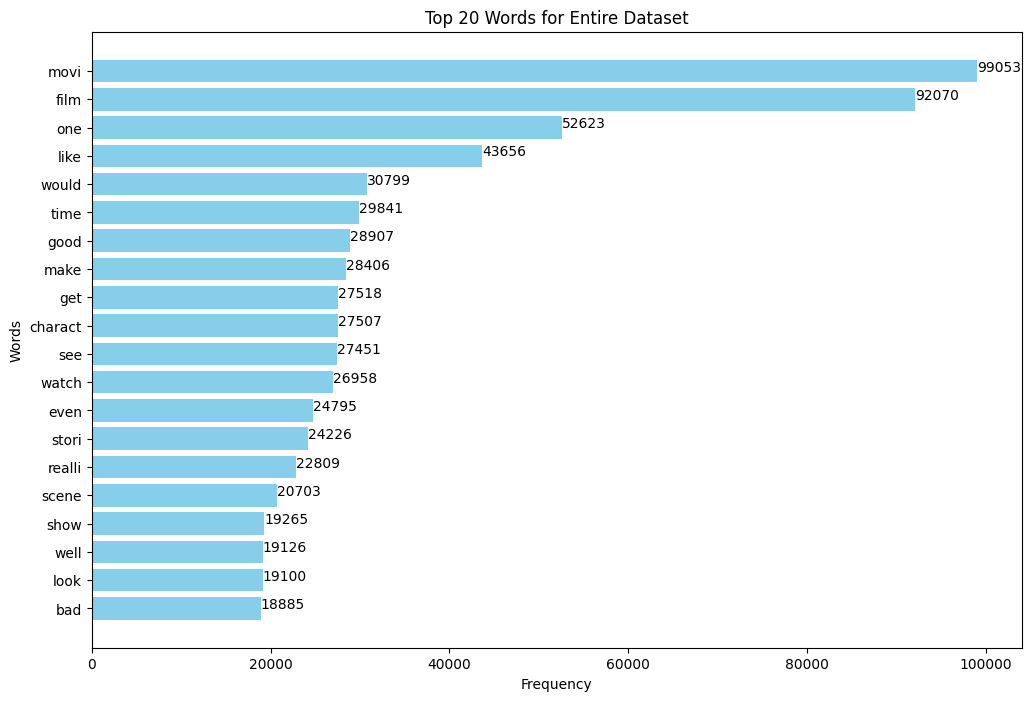

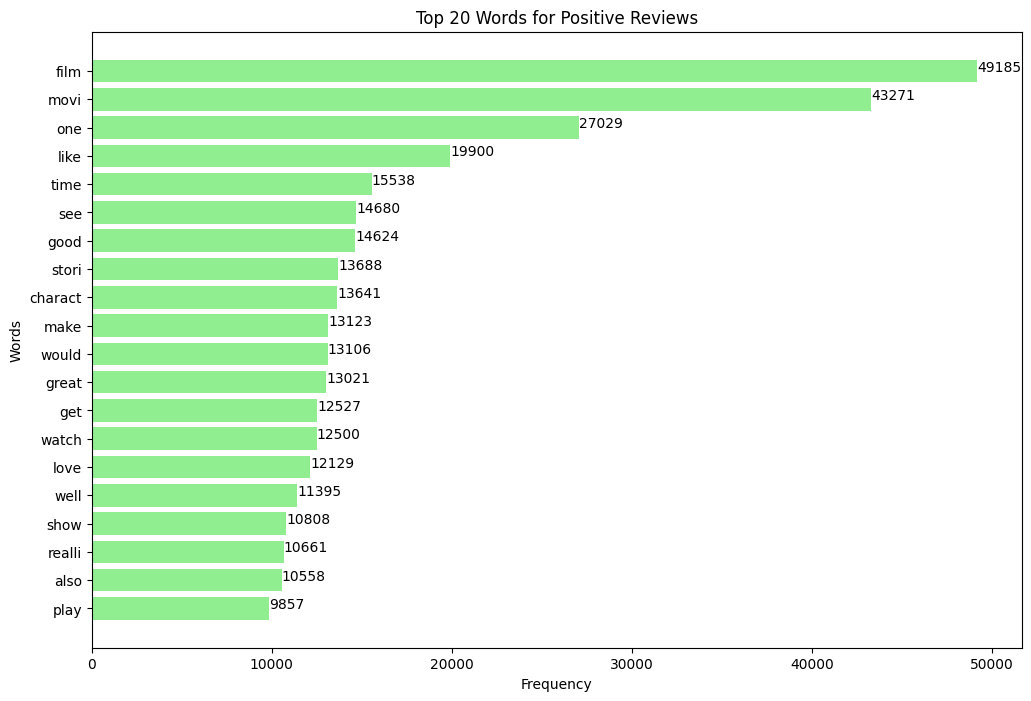

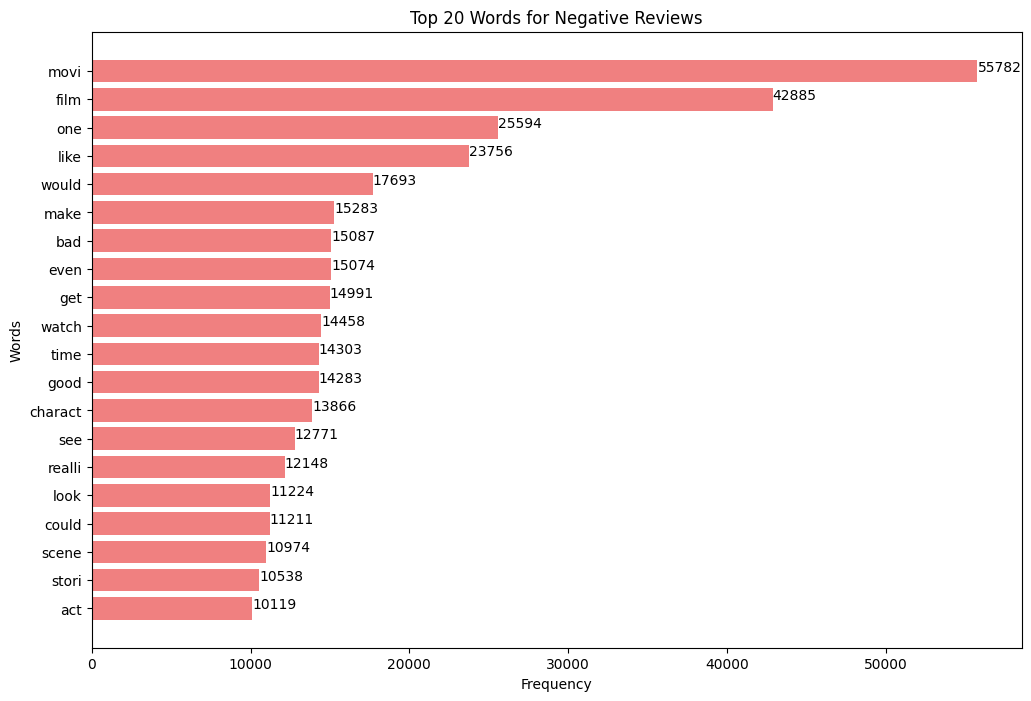

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of lists in the 'token' column for the entire dataset
all_reviews = [word for sublist in df1['token'] for word in sublist]

# Counter for the entire dataset
all_reviews_counter = Counter(all_reviews)

# Counter for positive reviews
positive_reviews = [word for sublist in df1[df1['sentiment_category'] == 'positive']['token'] for word in sublist]
positive_reviews_counter = Counter(positive_reviews)

# Counter for negative reviews
negative_reviews = [word for sublist in df1[df1['sentiment_category'] == 'negative']['token'] for word in sublist]
negative_reviews_counter = Counter(negative_reviews)

# Plot the top 20 words for the entire dataset
plt.figure(figsize=(12, 8))
top_20_all_reviews = all_reviews_counter.most_common(20)[::-1]  # Reverse the order
plt.barh(*zip(*top_20_all_reviews), color='skyblue')
for index, value in enumerate(top_20_all_reviews):
    plt.text(value[1], index, str(value[1]))
plt.title('Top 20 Words for Entire Dataset')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Plot the top 20 words for positive reviews
plt.figure(figsize=(12, 8))
top_20_positive_reviews = positive_reviews_counter.most_common(20)[::-1]  # Reverse the order
plt.barh(*zip(*top_20_positive_reviews), color='lightgreen')
for index, value in enumerate(top_20_positive_reviews):
    plt.text(value[1], index, str(value[1]))
plt.title('Top 20 Words for Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Plot the top 20 words for negative reviews
plt.figure(figsize=(12, 8))
top_20_negative_reviews = negative_reviews_counter.most_common(20)[::-1]  # Reverse the order
plt.barh(*zip(*top_20_negative_reviews), color='lightcoral')
for index, value in enumerate(top_20_negative_reviews):
    plt.text(value[1], index, str(value[1]))
plt.title('Top 20 Words for Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


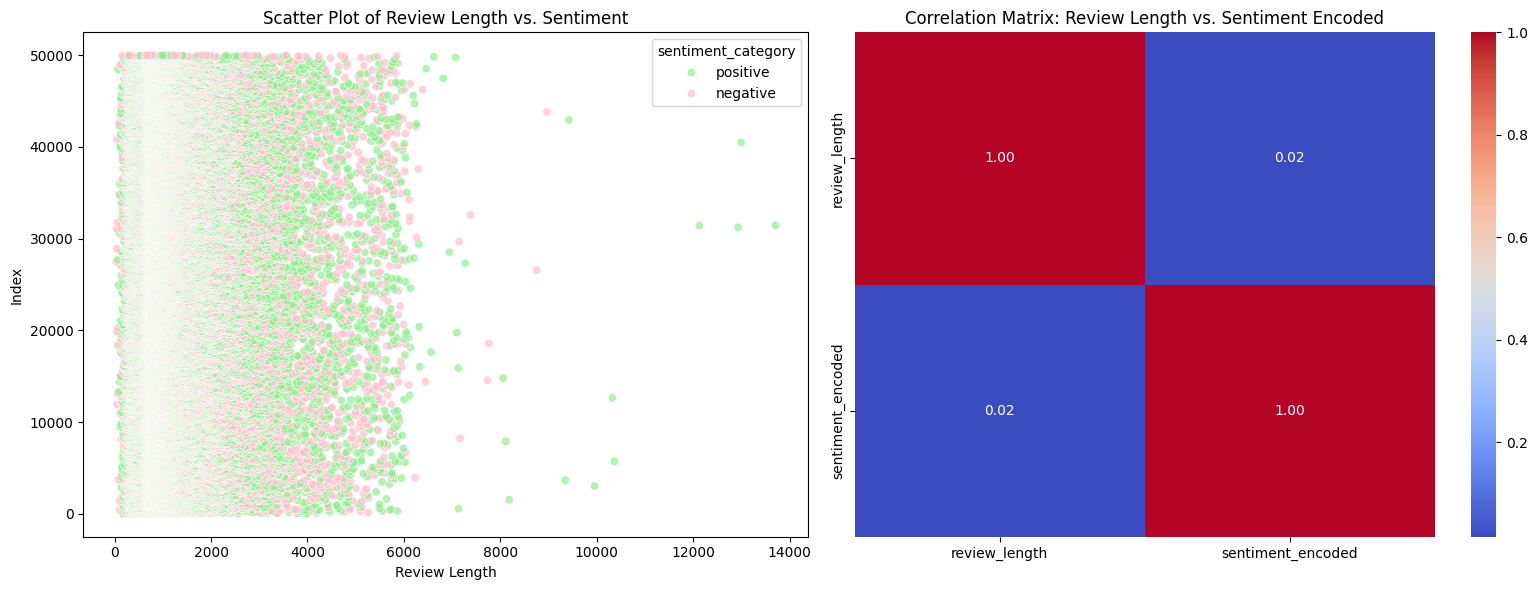

In [19]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for review length vs. sentiment
plt.figure(figsize=(16, 6))

# Subplot 1: Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='review_length', y=df1.index, hue='sentiment_category', data=df1, palette=['lightgreen', 'pink'], alpha=0.7)
plt.title('Scatter Plot of Review Length vs. Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Index')

# Subplot 2: Correlation matrix heatmap
plt.subplot(1, 2, 2)
# Add a new column for the length of reviews
df1['review_length'] = df1['review'].apply(len)

# Plot correlation matrix
correlation_matrix = df1[['review_length', 'sentiment_encoded']].corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize plot labels and title
plt.title('Correlation Matrix: Review Length vs. Sentiment Encoded')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


('look', 'like'): 3655
('watch', 'movi'): 3045
('ever', 'seen'): 2575
('special', 'effect'): 2222
('let', 'us'): 2018
('movi', 'ever'): 1948
('see', 'movi'): 1933
('even', 'though'): 1922
('movi', 'like'): 1908
('main', 'charact'): 1874
('one', 'best'): 1869
('make', 'movi'): 1690
('wast', 'time'): 1684
('year', 'old'): 1642
('watch', 'film'): 1600
('good', 'movi'): 1560
('want', 'see'): 1517
('horror', 'movi'): 1506
('seem', 'like'): 1475
('much', 'better'): 1431
('film', 'like'): 1406
('horror', 'film'): 1389
('bad', 'movi'): 1376
('would', 'like'): 1365
('like', 'movi'): 1338
('movi', 'one'): 1335
('first', 'time'): 1324
('make', 'film'): 1298
('see', 'film'): 1288
('new', 'york'): 1275


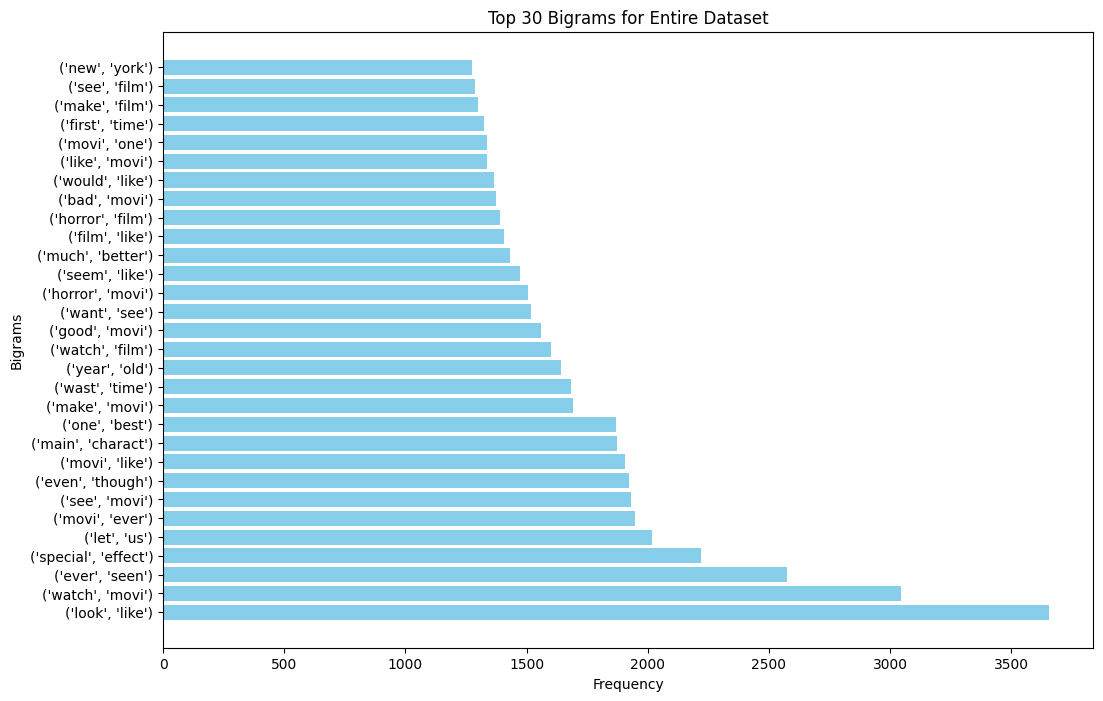

In [20]:
from nltk import bigrams
from collections import Counter

# Combine positive and negative reviews for bigram extraction
all_reviews_bigrams = list(bigrams([word for sublist in df1['token'] for word in sublist]))

# Counter for all reviews bigrams
all_reviews_bigrams_counter = Counter(all_reviews_bigrams)

# Get the top 30 bigrams
top_30_bigrams = all_reviews_bigrams_counter.most_common(30)

# Print the top 30 bigrams
for bigram, count in top_30_bigrams:
    print(f"{bigram}: {count}")

# Plot the top 30 bigrams
plt.figure(figsize=(12, 8))
bigrams, counts = zip(*top_30_bigrams)  # Unpack bigrams and counts separately

# Instead of plt.barh, use plt.bar with horizontal alignment
plt.barh(range(len(bigrams)), counts, color='skyblue')
plt.yticks(range(len(bigrams)), bigrams)  # Set y-ticks to display bigrams
plt.title('Top 30 Bigrams for Entire Dataset')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()



### Splitting

In [21]:
#!pip install scikit-learn
# Step 1: Splitting the data into training and testing sets (70-30 split)
from sklearn.model_selection import train_test_split

X = df1['token']  # Feature: tokenized words
y = df1['sentiment_encoded']  # Target: sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Text Vectorization

In [22]:
# Step 2: Text Vectorization using TF-IDF and Bag of Words (BoW)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype(str))
X_test_tfidf = tfidf_vectorizer.transform(X_test.astype(str))

# Bag of Words (BoW) Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train.astype(str))
X_test_bow = bow_vectorizer.transform(X_test.astype(str))

### Modelling (Train & Test) & Performance Measure


Models with TF-IDF:
-------------------------
Logistic Regression with TF-IDF:

Performance Metrics with TF-IDF - Logistic Regression:
Accuracy: 0.8833
Precision: 0.8738
Recall: 0.8972
F1 Score: 0.8854

Time taken for TF-IDF - Logistic Regression:
Training Time: 0.01 minutes
Prediction Time: 0.00 minutes

SVM with TF-IDF:

Performance Metrics with TF-IDF - SVM:
Accuracy: 0.8821
Precision: 0.8752
Recall: 0.8925
F1 Score: 0.8838

Time taken for TF-IDF - SVM:
Training Time: 5.12 minutes
Prediction Time: 1.06 minutes

Linear SVM with TF-IDF:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Performance Metrics with TF-IDF - Linear SVM:
Accuracy: 0.8745
Precision: 0.8682
Recall: 0.8844
F1 Score: 0.8762

Time taken for TF-IDF - Linear SVM:
Training Time: 0.00 minutes
Prediction Time: 0.00 minutes

Random Forest with TF-IDF:

Performance Metrics with TF-IDF - Random Forest:
Accuracy: 0.8424
Precision: 0.8450
Recall: 0.8402
F1 Score: 0.8426

Time taken for TF-IDF - Random Forest:
Training Time: 0.39 minutes
Prediction Time: 0.01 minutes

Models with Bag of Words:
-------------------------

Logistic Regression with BoW:

Performance Metrics with BoW - Logistic Regression:
Accuracy: 0.8631
Precision: 0.8593
Recall: 0.8698
F1 Score: 0.8645

Time taken for BoW - Logistic Regression:
Training Time: 0.03 minutes
Prediction Time: 0.00 minutes

SVM with BoW:

Performance Metrics with BoW - SVM:
Accuracy: 0.8509
Precision: 0.8468
Recall: 0.8584
F1 Score: 0.8526

Time taken for BoW - SVM:
Training Time: 55.39 minutes
Prediction Time: 0.70 minutes

Linear SVM with BoW:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Performance Metrics with BoW - Linear SVM:
Accuracy: 0.8517
Precision: 0.8480
Recall: 0.8587
F1 Score: 0.8533

Time taken for BoW - Linear SVM:
Training Time: 0.05 minutes
Prediction Time: 0.00 minutes

Random Forest with BoW:

Performance Metrics with BoW - Random Forest:
Accuracy: 0.8436
Precision: 0.8438
Recall: 0.8451
F1 Score: 0.8445

Time taken for BoW - Random Forest:
Training Time: 0.34 minutes
Prediction Time: 0.01 minutes


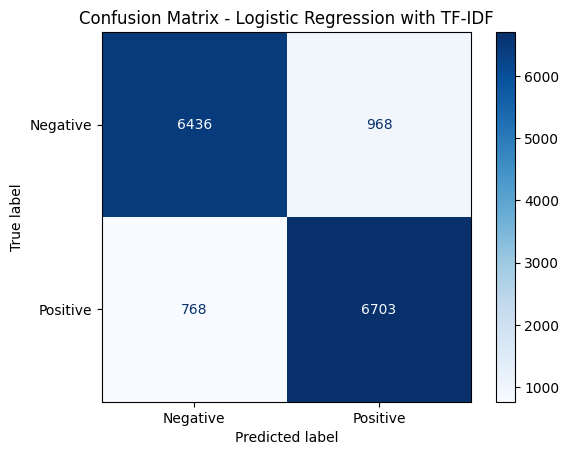

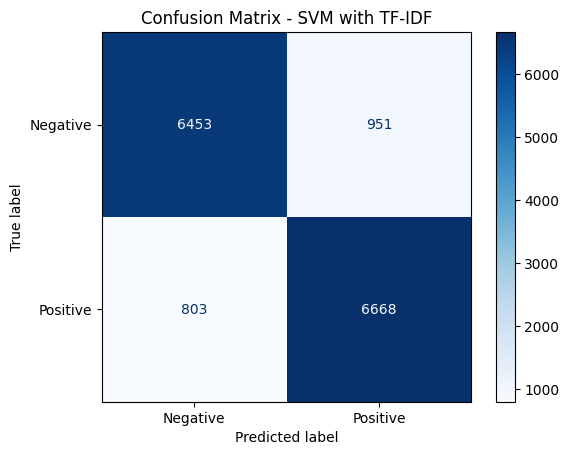

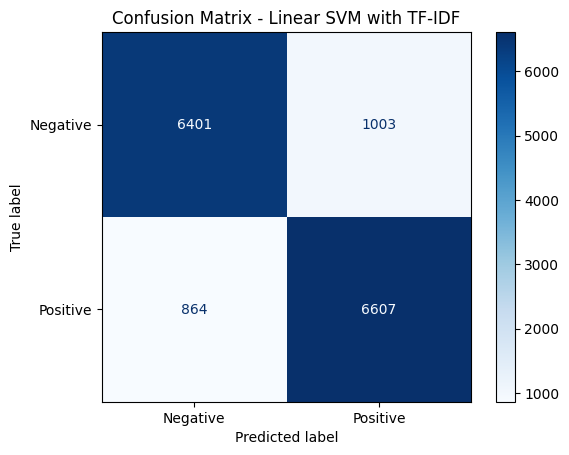

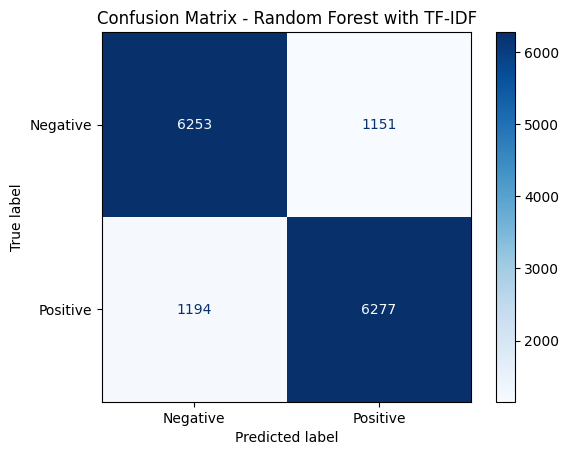

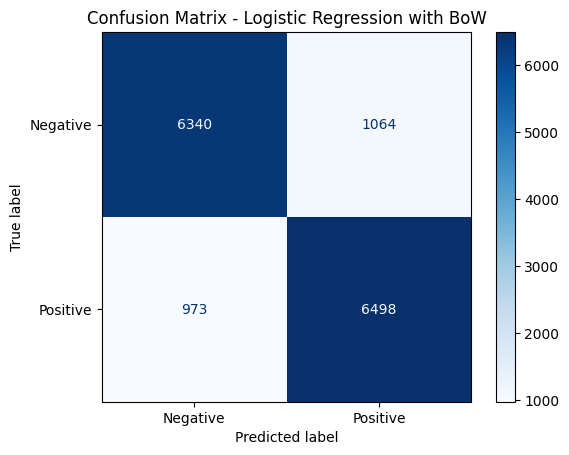

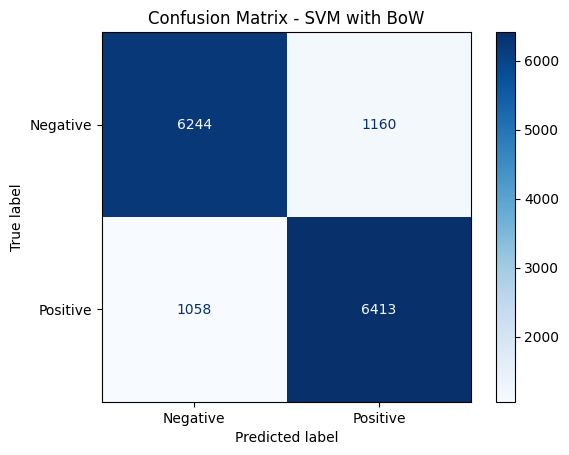

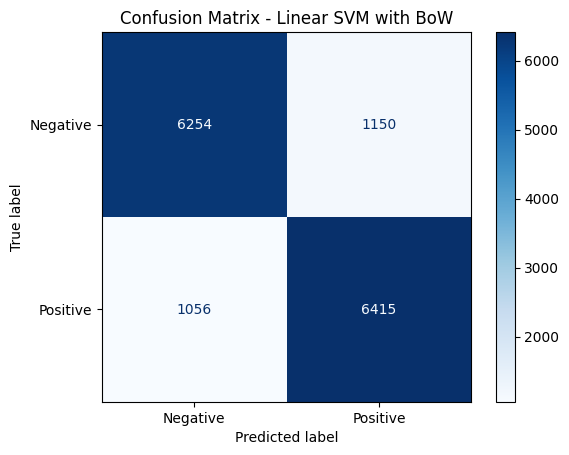

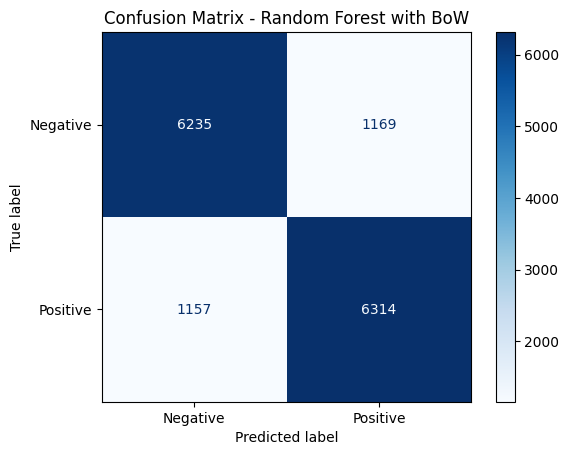

In [23]:
# Step 3: Modeling using Logistic Regression, SVM, Linear SVM, and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define a function to train and evaluate a model with time tracking
def train_and_evaluate_model_with_time(model, X_train, y_train, X_test, y_test, vectorization_type, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = (time.time() - start_time) / 60

    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = (time.time() - start_time) / 60

    # Print performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nPerformance Metrics with {vectorization_type} - {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name} with {vectorization_type}")

    # Print time taken
    print(f"\nTime taken for {vectorization_type} - {model_name}:")
    print(f"Training Time: {training_time:.2f} minutes")
    print(f"Prediction Time: {prediction_time:.2f} minutes")


print("\nModels with TF-IDF:")
print("-------------------------")

# Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
print("Logistic Regression with TF-IDF:")
train_and_evaluate_model_with_time(logistic_regression_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "TF-IDF", "Logistic Regression")

# SVM
svm_model = SVC(kernel='linear', random_state=42)
print("\nSVM with TF-IDF:")
train_and_evaluate_model_with_time(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "TF-IDF", "SVM")

# Linear SVM
linear_svm_model = LinearSVC(random_state=42, max_iter=1000)
print("\nLinear SVM with TF-IDF:")
train_and_evaluate_model_with_time(linear_svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "TF-IDF", "Linear SVM")

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
print("\nRandom Forest with TF-IDF:")
train_and_evaluate_model_with_time(random_forest_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "TF-IDF", "Random Forest")

# Repeat the process with Bag of Words (BoW)
print("\nModels with Bag of Words:")
print("-------------------------")

print("\nLogistic Regression with BoW:")
train_and_evaluate_model_with_time(logistic_regression_model, X_train_bow, y_train, X_test_bow, y_test, "BoW", "Logistic Regression")

print("\nSVM with BoW:")
train_and_evaluate_model_with_time(svm_model, X_train_bow, y_train, X_test_bow, y_test, "BoW", "SVM")

print("\nLinear SVM with BoW:")
train_and_evaluate_model_with_time(linear_svm_model, X_train_bow, y_train, X_test_bow, y_test, "BoW", "Linear SVM")

print("\nRandom Forest with BoW:")
train_and_evaluate_model_with_time(random_forest_model, X_train_bow, y_train, X_test_bow, y_test, "BoW", "Random Forest")

plt.show()
